# Homework Lesson2

In [4]:
import pandas as pd
import numpy as np 
import scipy

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Урок 2

####  Задача 1 .
*****
##### Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X). 


In [2]:
n = 5
p = 0.25 
q = 1 - p

$p(k=0) = C_n^kp^kq^{n-k} = C_5^0p^0q^5 = \frac{5!}{0!(5-0)!} \cdot 0.25^0 \cdot 0.75^5 = 1 \cdot 1 \cdot 0.2373046875 = 0.2373046875$

$p(k=1) = C_n^kp^kq^{n-k} = C_5^1p^1q^4 = \frac{5!}{1!(5-1)!} \cdot 0.25^1 \cdot 0.75^4 = 5 \cdot 0.25 \cdot 0.31640625 = 0.3955078125$

$p(k=2) = C_n^kp^kq^{n-k} = C_5^2p^2q^3 = \frac{5!}{2!(5-2)!} \cdot 0.25^2 \cdot 0.75^3 = 10 \cdot 0.0625 \cdot 0.421875 = 0.263671875$

$p(k=3) = C_n^kp^kq^{n-k} = C_5^3p^3q^2 = \frac{5!}{3!(5-3)!} \cdot 0.25^3 \cdot 0.75^2 = 10 \cdot 0.015625 \cdot 0.5625 = 0.087890625$

$p(k=4) = C_n^kp^kq^{n-k} = C_5^4p^4q^1 = \frac{5!}{4!(5-4)!} \cdot 0.25^4 \cdot 0.75^1 = 5 \cdot 0.00390625 \cdot 0.75 = 0.0146484375$

$p(k=5) = C_n^kp^kq^{n-k} = C_5^5p^5q^0 = \frac{5!}{5!(5-5)!} \cdot 0.25^5 \cdot 0.75^0 = 1 \cdot 0.0009765625 \cdot 1 = 0.0009765625$

$M(X) = np = 5 \cdot 0.25 = 1.25$

$D(X) = npq = 5 \cdot 0.25 \cdot 0.75 = 0.9375$

In [125]:
def binomial_distr(row):
     return (scipy.math.factorial(n)/(
         scipy.math.factorial(row["Questions"])*scipy.math.factorial(n - row["Questions"]))) * (
         p**row["Questions"]) *(q**(n-row["Questions"]))

control = pd.DataFrame([np.arange(6)] ).T.rename(columns={0 :"Questions"})
control["Probability"] = control.apply(binomial_distr, axis=1)

,0,1,2,3,4,5
Questions,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Probability,0.237305,0.395508,0.263672,0.087891,0.014648,0.000977


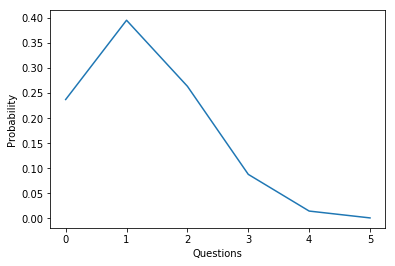

In [126]:
plt.plot(control["Questions"], control["Probability"])
plt.xlabel("Questions")
plt.ylabel("Probability");
control.T

####  Задача 2 .
*****
##### Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

In [163]:
n = 200
p = 0.01 
λ = n*p
m = np.arange(0,12)

$P_{ 4 < m < 11}  =   1 - P_{ m < 5} - P_{ m > 10} = 1 - (P_{ m = 0} +...P_{m = 4}) - (1 -(P_{ m = 0} +...P_{m = 10} ) ) \approx 0.05264 $

$P_m \approx \frac{\lambda^m}{m!}e^{-\lambda}$

In [166]:
def puason_distr(row):
     return (((n*p)**row["win"])/scipy.math.factorial(row["win"]))*np.exp(-(n*p))

shooting = pd.DataFrame([m]).T.rename(columns={0 :"win"})
shooting["Probability"] = shooting.apply(puason_distr, axis=1)
shooting= shooting.T

In [167]:
shooting

,0,1,2,3,4,5,6,7,8,9,10,11
win,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.00000,7.000000,8.000000,9.000000,10.000000,11.000000
Probability,0.135335,0.270671,0.270671,0.180447,0.090224,0.036089,0.01203,0.003437,0.000859,0.000191,0.000038,0.000007


In [168]:
1 - shooting.iloc[1,:5].sum() - (1 - shooting.iloc[1,:11].sum())

0.052644709119342714

####  Задача 3 .
*****
##### В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание? Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

In [186]:
# brute force solution 
# n = ?
p = 0.01 
λ = n*p
m = 10
P_m = 0.9

$P_{10} \approx \frac{\lambda^{10}}{10!}e^{-\lambda}\approx 0.9$

In [187]:
P = 0 
n = 0
while P < 0.9:
    P += (((n*p)**m)/ scipy.math.factorial(m)) * np.exp(-(n*p))
    n += 1

In [188]:
n

471